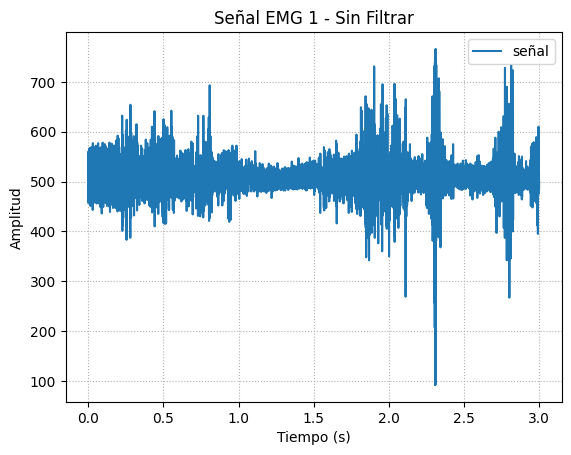

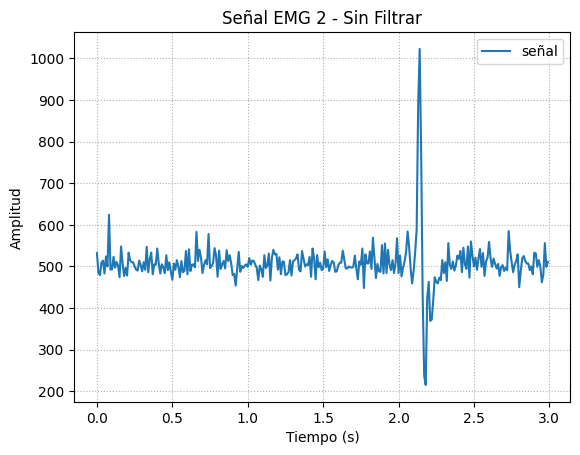

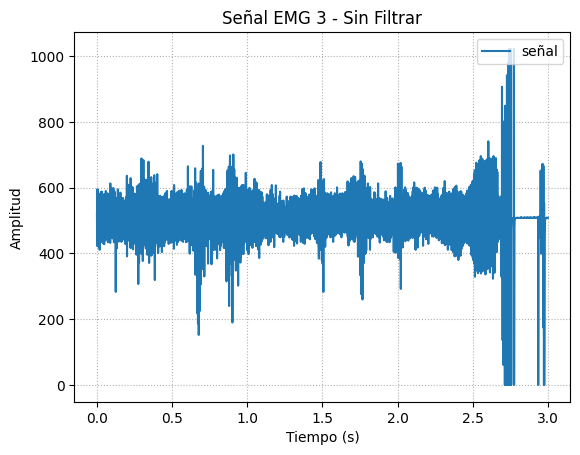

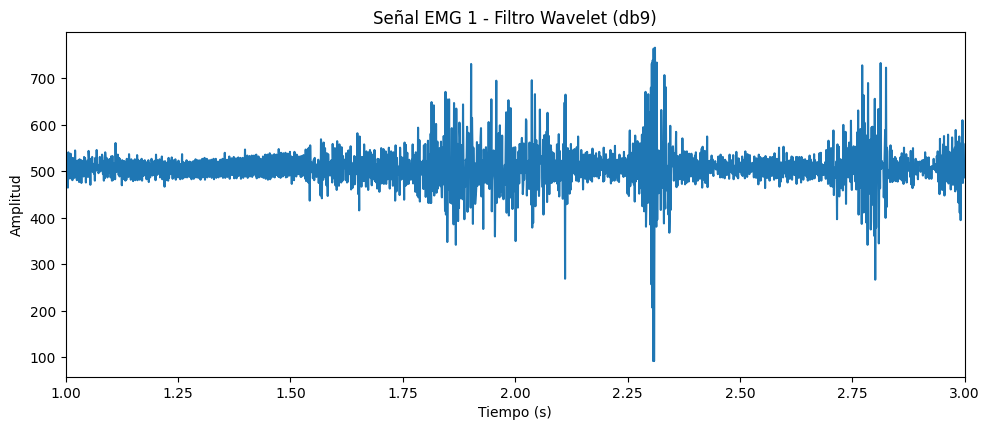

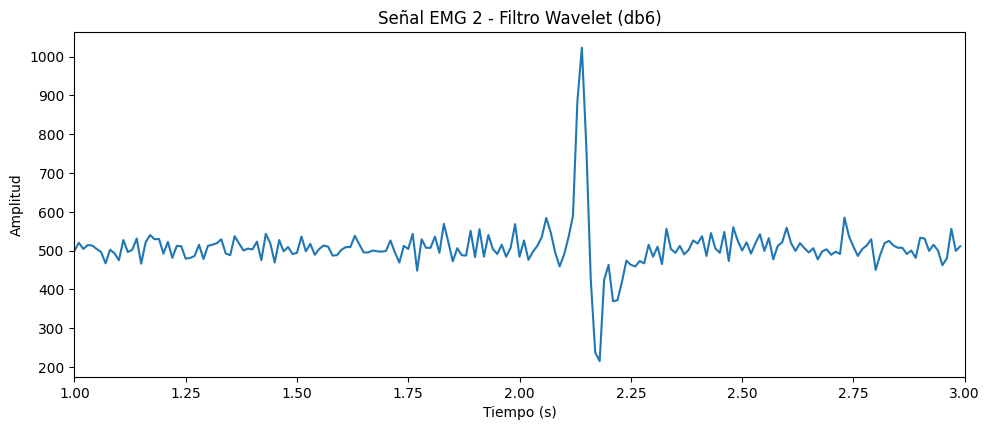

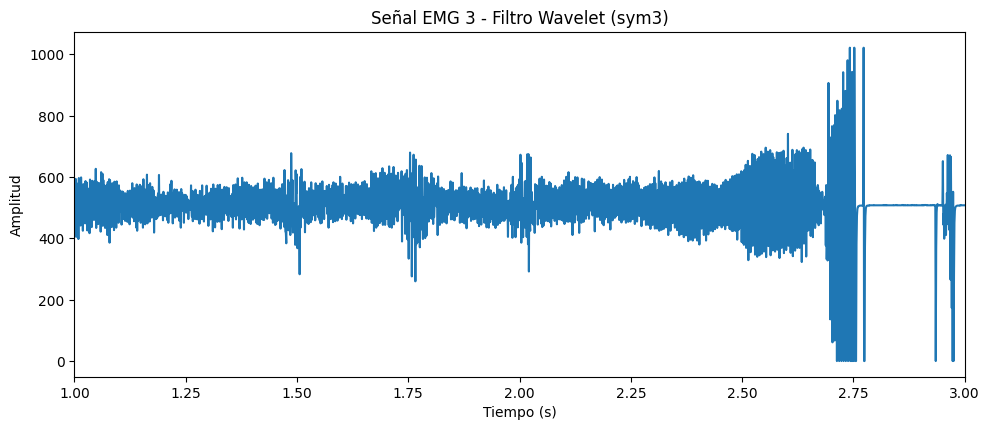

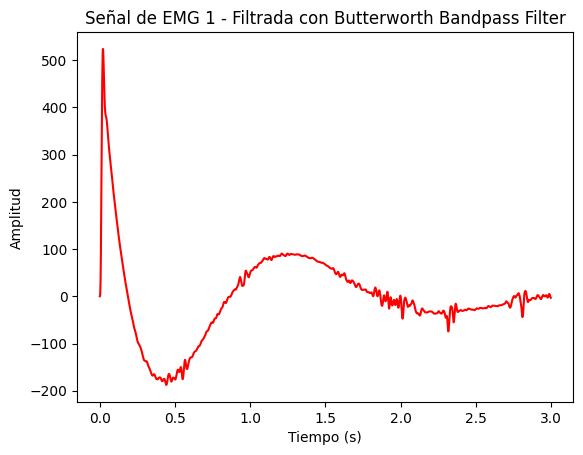

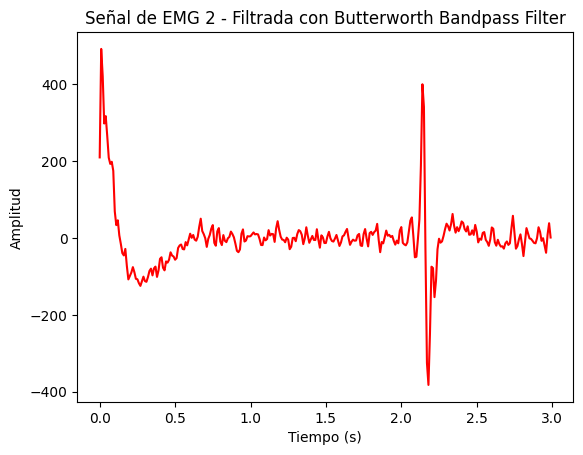

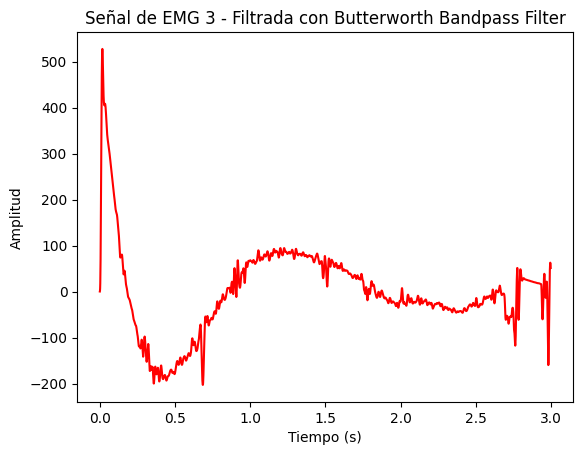

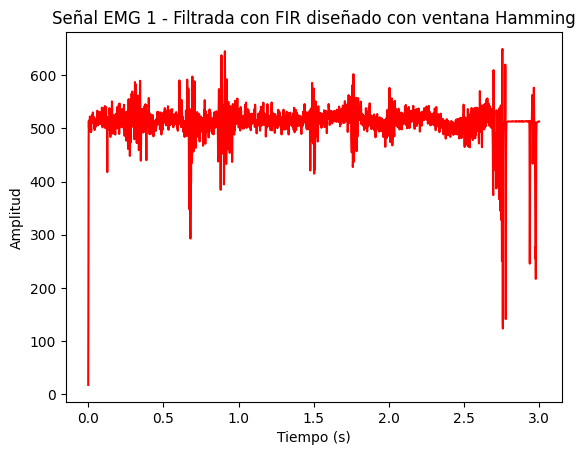

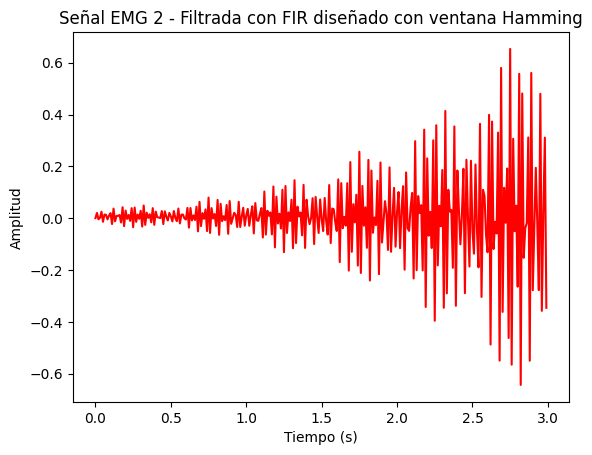

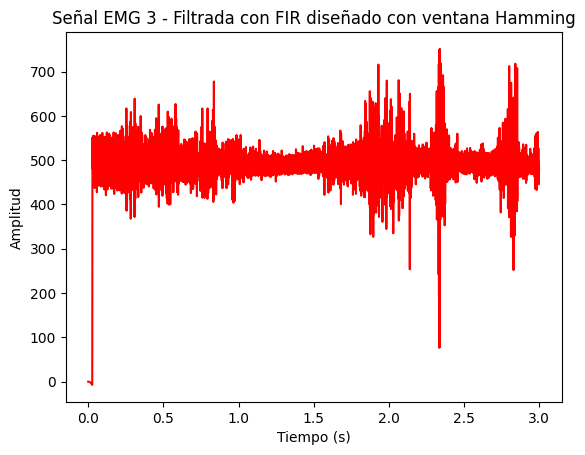

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import pywt
from scipy import signal
from scipy.signal import firwin, lfilter

"""## Obtenemos las señales sin filtrar

"""

arrayecg = np.genfromtxt("daniel-brazo.txt", delimiter="\t",skip_header = 3, missing_values= 0)
#Extraemos la columna de la señal
signalecg = arrayecg[:, 5]
signalecg = signalecg[0:3000]
Fs_ecg = 1000
Ts_ecg = 1/Fs_ecg
n_ecg= 3000
t_ecg = np.arange(0,n_ecg*Ts_ecg,Ts_ecg)
t_ecg

arrayemg = np.genfromtxt("piero-brazo.txt", delimiter="\t",skip_header = 3, missing_values= 0)
#Extraemos la columna de la señal
signalemg = arrayemg[:, 5]
signalemg = signalemg[0:300]
Fs_emg = 100
Ts_emg = 1/Fs_emg
n_emg= 300
t_emg = np.arange(0,n_emg*Ts_emg,Ts_emg)
t_emg

arrayeeg = np.genfromtxt("taco-brazo.txt", delimiter="\t",skip_header = 3, missing_values= 0)
#Extraemos la columna de la señal y creamos sus respectivos vectores tiempos
signaleeg = arrayeeg[:, 5]
signaleeg = signaleeg[0:3000]
Fs_eeg = 1000
Ts_eeg = 1/Fs_eeg
n_eeg= 3000
t_eeg = np.arange(0,n_eeg*Ts_eeg,Ts_eeg)
t_eeg

"""## Ploteamos las señales sin filtrar

## Ploteamos las señales sin filtrar
"""

plt.plot(t_ecg, signalecg, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.title("Señal EMG 1 - Sin Filtrar")
plt.show()

plt.plot(t_emg, signalemg, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.title("Señal EMG 2 - Sin Filtrar")
plt.show()

plt.plot(t_eeg, signaleeg, label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.title("Señal EMG 3 - Sin Filtrar")
plt.show()

"""## Aplicamos el filtrado con Wavelet




"""



umbral = 0.022

coeficientes_umbral_ecg = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes_ecg]

senal_filtrada_ecg = pywt.waverec(coeficientes_umbral_ecg, 'db9')

plt.figure(figsize=(10, 8))


plt.subplot(2, 1, 2)
plt.plot(t_ecg, senal_filtrada_ecg)
plt.xlim(1,3)
plt.title('Señal EMG 1 - Filtro Wavelet (db9)')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()


umbral = 0.022

coeficientes_umbral_emg = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes_emg]

senal_filtrada_emg = pywt.waverec(coeficientes_umbral_emg, 'db6')

plt.figure(figsize=(10, 8))


plt.subplot(2, 1, 2)
plt.plot(t_emg, senal_filtrada_emg)
plt.xlim(1,3)
plt.title('Señal EMG 2 - Filtro Wavelet (db6)')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

niveles_eeg = 8
coeficientes_eeg = pywt.wavedec(signaleeg, 'sym3', level=niveles_eeg)


umbral = 0.022

coeficientes_umbral_eeg = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes_eeg]

senal_filtrada_eeg = pywt.waverec(coeficientes_umbral_eeg, 'sym3')

plt.figure(figsize=(10, 8))


plt.subplot(2, 1, 2)
plt.plot(t_eeg, senal_filtrada_eeg)
plt.xlim(1,3)
plt.title('Señal EMG 3 - Filtro Wavelet (sym3)')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.tight_layout()
plt.show()

"""## Aplicamos el filtrado con IIR




"""

# Crear un filtro de banda de paso Butterworth con las características indicadas en la bibliografía
FL = 0.5  # Frecuencia de corte inferior
FH = 40  # Frecuencia de corte superior
butterworth_bandpass = signal.butter(4, [FL, FH], btype='band', analog=False, fs=Fs_ecg, output='ba')
# Aplicamos el filtro a la señal
filtered_ecg_signal = lfilter(butterworth_bandpass[0], butterworth_bandpass[1], signalecg)


plt.plot(t_ecg, filtered_ecg_signal, 'r', label='Señal de EMG 1 filtrada')
plt.title('Señal de EMG 1 - Filtrada con Butterworth Bandpass Filter')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Crear un filtro de banda de paso Butterworth con las características indicadas en la bibliografía
frequencies = [20, 500]  # Rango de frecuencia después del filtrado en Hz
Fs_emg = 100
w1 = 2 * np.pi * frequencies[0] / Fs_emg
w2 = 2 * np.pi * frequencies[1] / Fs_emg
butterworth_bandpass_emg = signal.butter(2, [w1, w2], btype='band', analog=False,fs=Fs_emg, output='ba')
emg_filtered = lfilter(butterworth_bandpass_emg[0], butterworth_bandpass_emg[1], signalemg)

plt.plot(t_emg, emg_filtered, 'r', label='Señal de EMG 2 filtrada')
plt.title('Señal de EMG 2 - Filtrada con Butterworth Bandpass Filter')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

# Crear un filtro de banda de paso Butterworth con las características indicadas en la bibliografía
FL_eeg = 0.5  # Frecuencia de corte inferior
FH_eeg = 50  # Frecuencia de corte superior
butterworth_bandpass_eeg = signal.butter(4, [FL_eeg, FH_eeg], btype='band', analog=False, fs=Fs_eeg, output='ba')
# Aplicamos el filtro a la señal
filtered_eeg_signal = lfilter(butterworth_bandpass_eeg[0], butterworth_bandpass_eeg[1], signaleeg)


plt.plot(t_eeg, filtered_eeg_signal, 'r', label='Señal de EEG 3 filtrada')
plt.title('Señal de EMG 3 - Filtrada con Butterworth Bandpass Filter')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

"""## Aplicamos el filtrado con FIR







"""

#Diseñamos el filtro FIR con las características indicadas en la literatura.
frecuencia_corte_1 = 0.5  # Frecuencia de corte 1 en Hz
frecuencia_corte_2 = 50  # Frecuencia de corte 2 en Hz
orden = 2  # Orden del filtro
numtaps = 2 * orden + 1
filtro_fir_eeg = firwin(numtaps, [frecuencia_corte_1, frecuencia_corte_2], pass_zero=False, fs=Fs_eeg, window='hamming')
eeg_filtered = lfilter(filtro_fir_eeg, 1, signaleeg)
plt.plot(t_eeg, eeg_filtered, 'r', label='Señal EEG filtrada')
plt.title('Señal EMG 1 - Filtrada con FIR diseñado con ventana Hamming')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

#Diseñamos el filtro FIR con las características indicadas en la literatura.
fc1 = 35  # Frecuencia de corte inferior en Hz
fc2 = 49  # Frecuencia de corte superior en Hz
fs = 1000  # Frecuencia de muestreo en Hz
orden = 1000  # Orden del filtro
filtro_fir_emg = firwin(orden + 1, [fc1, fc2], pass_zero=False, fs=Fs_emg, window='hamming')
emg_filtered = lfilter(filtro_fir_emg, 1, signalemg)
plt.plot(t_emg, emg_filtered, 'r', label='Señal EEG filtrada')
plt.title('Señal EMG 2 - Filtrada con FIR diseñado con ventana Hamming')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

#Diseñamos el filtro FIR con las características indicadas en la literatura.
frecuencia_corte = 0.5  # Frecuencia de corte en Hz
orden_filtro = 56  #Orden del filtro
filtro_fir_ecg = firwin(orden_filtro + 1, frecuencia_corte, window='hamming', fs=Fs_ecg, pass_zero=False)
ecg_filtered = lfilter(filtro_fir_ecg, 1, signalecg)
plt.plot(t_ecg, ecg_filtered, 'r', label='Señal ECG filtrada')
plt.title('Señal EMG 3 - Filtrada con FIR diseñado con ventana Hamming')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

In [ ]:
print(len(arrayeeg))

16665


In [ ]:
y = signaleeg
Fs = 1000


mean_y = np.average(y)
std_y = np.std(y)
#max
max_samp_val = np.max(y)
#min
min_samp_val = np.min(y)
#rms
rms = np.sqrt(np.sum(y*y))/len(y)

#area
area = np.trapz(y, dx=1/Fs)

time_param = {"Maximum EMG": max_samp_val, "Minimum EMG": min_samp_val,
              "Average EMG": mean_y, "Standard Deviation EMG": std_y, "RMS EMG": rms, "Area EMG": area}
print(time_param)


{'Maximum EMG': 1022.0, 'Minimum EMG': 0.0, 'Average EMG': 506.03766666666667, 'Standard Deviation EMG': 85.95689761670606, 'RMS EMG': 9.371280743728564, 'Area EMG': 1517.598}
